In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

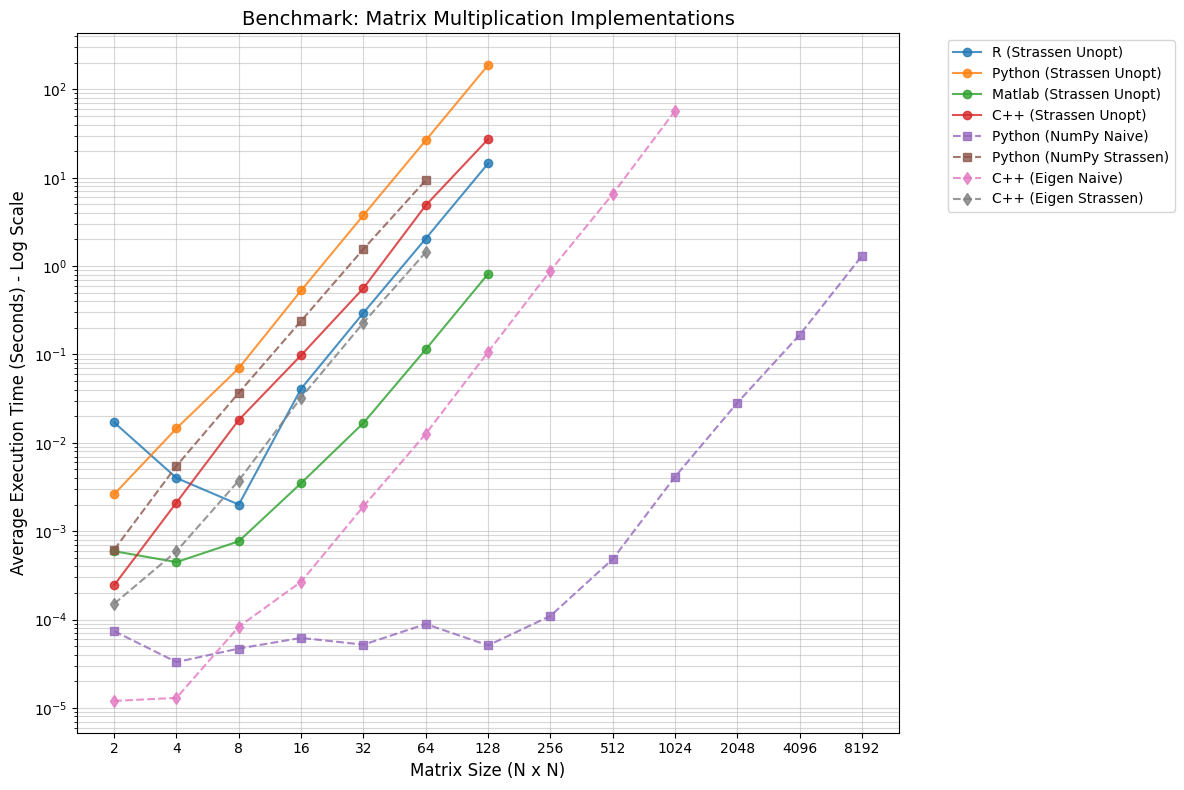

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Create the dataset
data = {
    'N': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192],
    'R (Strassen Unopt)': [0.017, 0.004, 0.002, 0.041, 0.296, 2.051, 14.5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Python (Strassen Unopt)': [0.002622, 0.014576, 0.06994, 0.529643, 3.772028, 26.51394, 188.065743, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Matlab (Strassen Unopt)': [0.000594, 0.000447, 0.000769, 0.003499, 0.016803, 0.114371, 0.816692, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'C++ (Strassen Unopt)': [0.000245, 0.00211, 0.018181, 0.098053, 0.562704, 4.878092, 27.3226, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Python (NumPy Naive)': [0.000074, 0.000033, 0.000047, 0.000062, 0.000052, 0.000089, 0.000051, 0.00011, 0.000483, 0.004134, 0.02842, 0.166775, 1.311303],
    'Python (NumPy Strassen)': [0.000618, 0.005483, 0.036853, 0.239787, 1.559668, 9.369346, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'C++ (Eigen Naive)': [0.000012, 0.000013, 0.000083, 0.000268, 0.001911, 0.012637, 0.106479, 0.889357, 6.543643, 57.168115, np.nan, np.nan, np.nan],
    'C++ (Eigen Strassen)': [0.000151, 0.000593, 0.003745, 0.032549, 0.228921, 1.434813, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

df = pd.DataFrame(data)

# 2. Setup the Plot
plt.figure(figsize=(12, 8))

# Define colors/styles to group "Unoptimized" vs "Optimized"
styles = {
    'R (Strassen Unopt)': 'o-', 'Python (Strassen Unopt)': 'o-', 
    'Matlab (Strassen Unopt)': 'o-', 'C++ (Strassen Unopt)': 'o-',
    'Python (NumPy Naive)': 's--', 'Python (NumPy Strassen)': 's--',
    'C++ (Eigen Naive)': 'd--', 'C++ (Eigen Strassen)': 'd--'
}

for column in df.columns[1:]:
    plt.plot(df['N'], df[column], styles[column], label=column, alpha=0.8)

# 3. Formatting
plt.xscale('log', base=2)
plt.yscale('log')
plt.xticks(df['N'], df['N'])
plt.xlabel('Matrix Size (N x N)', fontsize=12)
plt.ylabel('Average Execution Time (Seconds) - Log Scale', fontsize=12)
plt.title('Benchmark: Matrix Multiplication Implementations', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.tight_layout()

# 4. Show/Save
plt.show()
